In [1]:
%load_ext autoreload 
%autoreload 2 

In [2]:
# import packages
import matplotlib.pyplot as plt

import image_manipulation as im

In [3]:
# 50 images from ImageNet data set 
import shap
import json
X, y = shap.datasets.imagenet50()

# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
print("Number of ImageNet classes:", len(class_names))

Number of ImageNet classes: 1000


In [4]:
# update plt parameters
rc = {"axes.spines.left" : True,
      "axes.spines.right" : True,
      "axes.spines.bottom" : True,
      "axes.spines.top" : True,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)

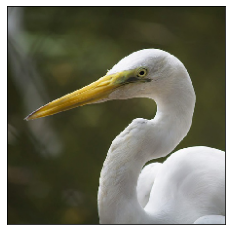

In [5]:
# 1 = American_egret, 2 = speedboat, 3 = puck, 7 = mask, 11 = bittern, 15 = rapeseed, 21 = Burger
# 44 = Basketball, 45 = bolete
image_index = 1
image = X[image_index]
normalized_image = image / 255

# show image
plt.imshow(normalized_image)
plt.show()

In [6]:
# create patch list from image

# patch_size makes squared amount of patches
patch_size = 4
patch_list = im.make_patches(image, patch_size)

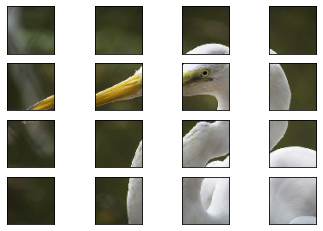

In [7]:
# visualize patches

# create subplot
fig, axs = plt.subplots(patch_size, patch_size)

# fill subplot with for loop
index = 0
for y in range(patch_size):
    for x in range(patch_size):
        axs[x,y].imshow(patch_list[index] / 255)
        index += 1
plt.show()


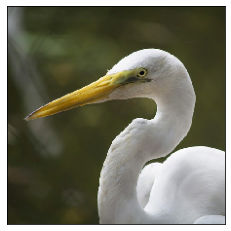

In [8]:
# reverse the patch list to image

normal_image = im.reassemble_image(patch_list)

plt.imshow(normal_image / 255)
plt.show()


In [9]:
# shuffle patch list

shuffled_patches, order = im.shuffle_patch_list(patch_list)

#print the order in which the image patches are shuffled
print(order)

[ 6  3  8 10 15 13  1 14  4  2  5 12  0 11  9  7]


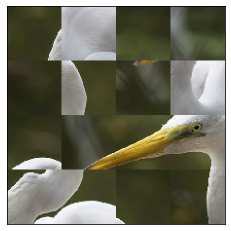

In [10]:
# reassemble image from shuffled list

jigsaw = im.reassemble_image(shuffled_patches)

plt.imshow(jigsaw / 255)
plt.show()

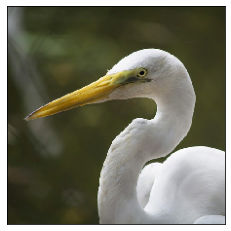

In [11]:
# reassemble normal ordered patch list from shuffled list

patch_list_ordered = im.sort_patch_list(shuffled_patches, order)
normal_image = im.reassemble_image(patch_list_ordered)

plt.imshow(normal_image / 255)
plt.show()